<a href="https://colab.research.google.com/github/varya4414/Age-classifier/blob/master/Age%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import layers
from keras.layers import Input, Dense, Activation,  BatchNormalization, Flatten, Conv2D
from keras.layers import  MaxPooling2D, Dropout
%matplotlib inline


Using TensorFlow backend.


In [0]:
import cv2
train_label = pd.read_csv(os.path.join('/content/drive/My Drive/Age_detection/train_DETg9GD/train.csv'))
train_label.shape

(19906, 2)

In [0]:
from keras.preprocessing import image
gen = image.ImageDataGenerator(rotation_range = 10, width_shift_range = 0.15, shear_range = 0.25,
                               height_shift_range = 0.15, zoom_range = 0.2, horizontal_flip = True)

In [0]:
temp1=[]
temp=[]
i=0
for img_name in train_label.ID:
  img_path=os.path.join('/content/drive/My Drive/Age_detection/train_DETg9GD/Train', img_name)
  image = np.expand_dims(cv2.imread(img_path),0)
  aug_img = gen.flow(image)
  for j in range(10):
    img1  = (next(aug_img)[0].astype("float64"))
    temp.append(cv2.resize(img1,(32,32)))
    temp1.append(train_label.Class[i])
  i+=1
  if i%100==0:
    print(img1.shape,i)

In [0]:
train_x = np.stack(temp)
train_label = np.stack(temp1)

In [0]:
# train_x.to_csv('/content/drive/My Drive/Age_detection/train_x.csv',index=0)
np.save("/content/drive/My Drive/Age_detection/train_x", train_x)

In [0]:
import cv2
train_x1 = np.load("/content/drive/My Drive/Age_detection/train_x.npy")
temp=[]
for img in train_x1:
  img = cv2.resize(img,(32,32))
  temp.append(img)

In [0]:
train_x=np.stack(temp)

In [0]:
train_x.shape

(199060, 32, 32, 3)

In [0]:
from random import randrange
temp=[]
temp1=[]
old=0
young=0
middle=0
vis1=[0]*len(train_label)
vis=np.array(vis1)
for x in range(100000):
  i = randrange(len(train_label))
  if(vis[i]==0):
    if(train_label[i]=="YOUNG" and young<10000):
      temp.append(train_x[i])
      temp1.append("YOUNG")
      young+=1
    if(train_label[i]=="OLD" and old<10000):
      temp.append(train_x[i])
      temp1.append("OLD")
      old+=1
    if(train_label[i]=="MIDDLE" and middle<10000):
      temp.append(train_x[i])
      temp1.append("MIDDLE")
      middle+=1
    vis[i]=1


In [0]:
train_label1=np.stack(temp1)
train_x1=np.stack(temp)

In [0]:
train_label1.shape

(29557,)

In [0]:
print("old" ,old)
print("young = " , young)
print("middle= ", middle)


old 9557
young =  10000
middle=  10000


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x1, train_label1, test_size=0.15, random_state=1)
X_train=X_train/255
X_test=X_test/255

In [0]:
y_train.shape

(25123,)

'OLD'

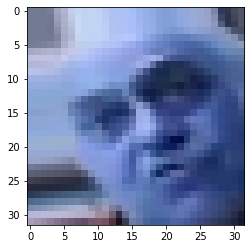

In [0]:
from random import randrange
index=randrange(len(X_train))
plt.imshow(X_train[index])
y_train[index]

In [0]:
import keras
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_y = lb.fit_transform(y_train)
test_y = lb.fit_transform(y_test)
y_train = keras.utils.np_utils.to_categorical(train_y)
y_test=   keras.utils.np_utils.to_categorical(test_y)

In [0]:
X_test.shape


(4434, 32, 32, 3)

In [0]:
X_train.shape

(25123, 32, 32, 3)

In [0]:
# HSV Image
import cv2
def RGB2HSV(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  return img


In [0]:
# Gray Scale
import cv2
def RGB2Gray(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=np.reshape(img,(128,128,1))
  return img

In [0]:
#HSV Image
HSVX1_train=[];
for img in X_train:
  HSVX1_train.append(RGB2HSV(img))
HSVX_train=np.stack(HSVX1_train)

In [0]:
# Gray Scale
GrayX1_train=[];
for img in X_train:
  GrayX1_train.append(RGB2Gray(img))
GrayX_train=np.stack(GrayX1_train)

In [0]:
GrayX1_test=[];
for img in X_test:
  GrayX1_test.append(RGB2Gray(img))
GrayX_test=np.stack(GrayX1_test)

In [0]:
from keras.models import Sequential
classifier=Sequential()
classifier.add(Conv2D(32,(5,5),input_shape=(32,32,3),strides=1,activation='relu'))
#classifier.add(Conv2D(32,(5,5),padding = "same",activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D())

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Conv2D(128,(3,3), padding = "same" , activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D())

classifier.add(Conv2D(128,(5,5), activation='relu'))
classifier.add(BatchNormalization())

# classifier.add(Conv2D(64,(3,3),activation='relu'))
# classifier.add(Conv2D(64,(5,5), padding = "same" , activation='relu'))
# classifier.add(MaxPooling2D(padding="same"))

# classifier.add(Conv2D(64,(3,3),activation='relu'))
# classifier.add(Conv2D(128,(5,5), padding = "same" , activation='relu'))
# classifier.add(BatchNormalization())
# classifier.add(MaxPooling2D(padding="same"))

# classifier.add(Conv2D(128,(3,3),activation='relu'))
# classifier.add(BatchNormalization())
# classifier.add(MaxPooling2D(padding="same"))

# classifier.add(Conv2D(128,(3,3),activation='relu'))
# classifier.add(BatchNormalization())
# classifier.add(MaxPooling2D())

classifier.add(Flatten())
Dropout(0.3)
# classifier.add(Dense(units = 1000, activation = 'relu'))


classifier.add(Dense(units = 200, activation = 'relu'))
Dropout(0.3)
classifier.add(Dense(units = 100, activation = 'relu'))
Dropout(0.2)
classifier.add(Dense(units = 50, activation = 'relu'))
Dropout(0.2)
classifier.add(Dense(units = 3 , activation = 'softmax'))
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
batch_normalization_11 (Batc (None, 12, 12, 128)      

In [0]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
25123/25123 [==============================] - 17s 691us/step - loss: 0.9121 - acc: 0.5710
Epoch 2/10
25123/25123 [==============================] - 16s 621us/step - loss: 0.7792 - acc: 0.6567
Epoch 3/10
25123/25123 [==============================] - 16s 630us/step - loss: 0.6996 - acc: 0.7011
Epoch 4/10
25123/25123 [==============================] - 16s 657us/step - loss: 0.6374 - acc: 0.7324
Epoch 5/10
25123/25123 [==============================] - 16s 619us/step - loss: 0.5710 - acc: 0.7609
Epoch 6/10
25123/25123 [==============================] - 16s 620us/step - loss: 0.5036 - acc: 0.7968
Epoch 7/10
25123/25123 [==============================] - 16s 627us/step - loss: 0.4355 - acc: 0.8251
Epoch 8/10
25123/25123 [==============================] - 16s 624us/step - loss: 0.3675 - acc: 0.8540
Epoch 9/10
25123/25123 [==============================] - 16s 627us/step - loss: 0.3042 - acc: 0.8778
Epoch 10/10
25123/25123 [==============================] - 16s 641us/step - loss: 

In [0]:
test_prediction_tree=classifier.predict(X_test)  

In [0]:
for i in range(len(test_prediction_tree)):
  if(test_prediction_tree[i][0]==test_prediction_tree[i][1]==test_prediction_tree[i][2]):
    test_prediction_tree[i][0]=1
    test_prediction_tree[i][1]=0
    test_prediction_tree[i][2]=0
  elif(test_prediction_tree[i][0]==test_prediction_tree[i][1]):
    if(test_prediction_tree[i][2]>test_prediction_tree[i][1]):
      test_prediction_tree[i][2]=1;
      test_prediction_tree[i][0]=0;
      test_prediction_tree[i][1]=0;
    else :
      test_prediction_tree[i][0]=1
      test_prediction_tree[i][1]=0
      test_prediction_tree[i][2]=0
  elif(test_prediction_tree[i][1]==test_prediction_tree[i][2]):
    if(test_prediction_tree[i][0]>test_prediction_tree[i][1]):
      test_prediction_tree[i][2]=0;
      test_prediction_tree[i][0]=1;
      test_prediction_tree[i][1]=0;
    else :
      test_prediction_tree[i][0]=0
      test_prediction_tree[i][1]=1
      test_prediction_tree[i][2]=0
  elif(test_prediction_tree[i][0]==test_prediction_tree[i][2]):
    if(test_prediction_tree[i][0]>test_prediction_tree[i][1]):
      test_prediction_tree[i][2]=0;
      test_prediction_tree[i][0]=1;
      test_prediction_tree[i][1]=0;
    else :
      test_prediction_tree[i][0]=0
      test_prediction_tree[i][1]=1
      test_prediction_tree[i][2]=0
  else :
    if(max(test_prediction_tree[i][0],test_prediction_tree[i][1],test_prediction_tree[i][2])==test_prediction_tree[i][0]):
      test_prediction_tree[i][0]=1
      test_prediction_tree[i][1]=0
      test_prediction_tree[i][2]=0
    elif(max(test_prediction_tree[i][0],test_prediction_tree[i][1],test_prediction_tree[i][2])==test_prediction_tree[i][1]):
      test_prediction_tree[i][0]=0
      test_prediction_tree[i][1]=1
      test_prediction_tree[i][2]=0
    else :
      test_prediction_tree[i][0]=0
      test_prediction_tree[i][1]=0
      test_prediction_tree[i][2]=1

In [0]:
count=0;
for x in range(len(y_test)):
  if(y_test[x][0]==test_prediction_tree[x][0] and y_test[x][1]==test_prediction_tree[x][1] and y_test[x][2]==test_prediction_tree[x][2]):
    count+=1
count/len(y_test)

0.7568786648624267